# Features names out

Having the ability to identify columns after applying transformations using different sklearn transformers is highly crucial. By default, sklearn transformers generate `numpy.array` outputs, lacking the column structure found in `pandas.DataFrame`.

Fortunately, a solution to this problem has been introduced in `sklearn==1.1`. This solution involves the utilization of the `get_feature_names_out` method, which returns the feature names as values.

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

from IPython.display import HTML
header_template = "<p style='font-size:17px'>{}</p>"

from sklearn.preprocessing import (
    FunctionTransformer,
    StandardScaler,
    PolynomialFeatures,
    OneHotEncoder
)
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

# this is frame with few numeric columns that
# is typically used for examples
input_frame = pd.DataFrame({
    f"feature{n}" : np.random.normal(0, 10, 5)
    for n in range(3)
})

## Defined names

There are converters that specify columns output names by themselves. In them you can simply call `get_features_names_out` in the trained object and the input names of the features will be returned. Some examples of such transformers:]

- `StandartScaler`;
- `OneHotEncoder`;
- `ColumnTransformer`;
- `PolynomialFeatures`;
- `CountVectorizer`;
- `TfidfVectorizer`.

### `StandartScaler`

So in the following example cell is for `StandardScaler` - it just keeps names of the input array:

In [2]:
display(HTML(header_template.format("Input dataframe")))
display(input_frame)

my_scaler = StandardScaler()
display(HTML(header_template.format("transform result")))
display(my_scaler.fit_transform(input_frame))

display(HTML(header_template.format(".get_features_names_out result")))
display(my_scaler.get_feature_names_out())

,feature0,feature1,feature2
0,-14.280722,31.497491,6.184412
1,-2.075748,-8.914110,-22.870986
2,-5.787826,-8.953351,7.191721
3,2.867856,-1.689381,-0.849110
4,-1.705764,-2.525341,9.514077


array([[-1.75635129,  1.95850161,  0.53512169],
       [ 0.3693552 , -0.71405318, -1.91325944],
       [-0.27716716, -0.71664833,  0.62000351],
       [ 1.23036894, -0.23625764, -0.05756487],
       [ 0.43379432, -0.29154246,  0.81569911]])

array(['feature0', 'feature1', 'feature2'], dtype=object)

### `PolynomialFeatures`

The example we considered before was for `StandardScaler` - it returns the same amount of features as it was in the input. But what if we consider transformers that output more columns than there were in the input?

Obviously `PolynomialFeatures` belongs to such transformers in that it returns products and powers of the original features. So the next cell prints out `get_feature_names` from `PolynomialFeatures`.

In [3]:
poly_transformer = PolynomialFeatures()
poly_transformer.fit_transform(input_frame)

display(HTML(header_template.format("Input frame")))
display(input_frame)
display(HTML(header_template.format("Output feature names")))
display(poly_transformer.get_feature_names_out())

,feature0,feature1,feature2
0,-14.280722,31.497491,6.184412
1,-2.075748,-8.914110,-22.870986
2,-5.787826,-8.953351,7.191721
3,2.867856,-1.689381,-0.849110
4,-1.705764,-2.525341,9.514077


array(['1', 'feature0', 'feature1', 'feature2', 'feature0^2',
       'feature0 feature1', 'feature0 feature2', 'feature1^2',
       'feature1 feature2', 'feature2^2'], dtype=object)

Everything is pretty simple - it writes the names of the inputs used in the product one by one and uses the `^` symbol to declare the power.

It seems that other transformers with such features will have something similar - quite simple, but not really customisable.

## `FunctionTransformer`

This transformer have a bit tricky behaviour of `get_feature_names_out` method. 

You have to specify `feature_names_out`. It can be `"one-to-one"` or something callable. For both options I have examples below.

### `"one-to-one"`

`one-to-one` simply causes `.get_feature_names_out` to return the feature names as they were in the input. The following example is sutitable for `dummy` transformer - the following example is suitable for the `dummy` transformer - it simply returns it's input.

In [4]:
display(HTML(header_template.format("Input dataframe")))
display(input_frame)

my_scaler = FunctionTransformer(
    lambda X : X,
    feature_names_out = "one-to-one"
)
display(HTML(header_template.format("transform result")))
display(my_scaler.fit_transform(input_frame))

display(HTML(header_template.format(".get_features_names_out result")))
display(my_scaler.get_feature_names_out())

,feature0,feature1,feature2
0,-14.280722,31.497491,6.184412
1,-2.075748,-8.914110,-22.870986
2,-5.787826,-8.953351,7.191721
3,2.867856,-1.689381,-0.849110
4,-1.705764,-2.525341,9.514077


,feature0,feature1,feature2
0,-14.280722,31.497491,6.184412
1,-2.075748,-8.914110,-22.870986
2,-5.787826,-8.953351,7.191721
3,2.867856,-1.689381,-0.849110
4,-1.705764,-2.525341,9.514077


array(['feature0', 'feature1', 'feature2'], dtype=object)

**Note**: While the usefulness of `.get_feature_names_out` may not be apparent in the current case where a transformer returns a dataframe, it becomes valuable in more complex pipelines where it remembers feature names in a scikit-learn style. Its ability to retain names can be crucial in such scenarios, making it a useful feature to have.

### Callable

If you pass callable as argument to `feature_names_out` it will be called with `.get_feature_names_out`. It should instance of `FunctionTransformer` that called method and input array of input features. 

#### Expected inputs

Let's study what is passed to the specified in `feature_names_out` funcion on the example. Let's just try to substitute such a function that will return its own input elements.

In [5]:
my_transformer = FunctionTransformer(
    lambda X: np.array(X),
    # here is just function that returns
    # it's inputs to check what they actualy
    # are
    feature_names_out=(
        lambda transformer, input_features: \
        (transformer, input_features)
    )
)
my_transformer.fit_transform(input_frame)
features_output = my_transformer.get_feature_names_out()

display(HTML(header_template.format("First argument - transformer itself")))
display(features_output[0])
print(
    "Check if first input of the feature_names_out"
    "really initial transformer - ",
    features_output[0] is my_transformer
)
display(HTML(header_template.format("Second argument - input feature names")))
features_output[1]

FunctionTransformer(feature_names_out=<function <lambda> at 0x726f0464c1f0>,
                    func=<function <lambda> at 0x726f0464c160>)

Check if first input of the feature_names_outreally initial transformer -  True


array(['feature0', 'feature1', 'feature2'], dtype=object)

#### Real world example

Here is an example of how the tools we are considering might be used in the real world.

Suppose you need to build a transformer that returns squares and cubes of each feature of the input array. And the result features should have names `<inputname> square` for squares and `<inputname> cube` for cubes.

This can be achieved with the following code:

In [6]:
my_transformer = FunctionTransformer(
    # iterates over all input features
    # and returns square and cube of them
    lambda X : np.concatenate(
        [
            np.array(X[[col]]**power)
            for col in X
            for power in range(2,4)
        ], 
        axis = 1
    ),
    # iterates over input features anmes
    # and for each creates pair of square
    # and cube name
    feature_names_out = (
        lambda transformer, input_features: [
            f"{feature} {power_str}"
            for feature in input_features
            for power_str in ["square", "cubic"]
        ]
    )
)

display(HTML(header_template.format("Input dataframe")))
display(input_frame)

display(HTML(header_template.format("transform output")))
display(my_transformer.fit_transform(input_frame))

display(HTML(header_template.format(".get_feature_names_out")))
display(my_transformer.get_feature_names_out())

,feature0,feature1,feature2
0,-14.280722,31.497491,6.184412
1,-2.075748,-8.914110,-22.870986
2,-5.787826,-8.953351,7.191721
3,2.867856,-1.689381,-0.849110
4,-1.705764,-2.525341,9.514077


array([[ 2.03939021e+02, -2.91239646e+03,  9.92091924e+02,
         3.12484062e+04,  3.82469580e+01,  2.36534965e+02],
       [ 4.30872906e+00, -8.94383501e+00,  7.94613487e+01,
        -7.08327166e+02,  5.23081992e+02, -1.19634008e+04],
       [ 3.34989304e+01, -1.93885982e+02,  8.01624893e+01,
        -7.17722882e+02,  5.17208506e+01,  3.71961926e+02],
       [ 8.22459681e+00,  2.35869576e+01,  2.85400873e+00,
        -4.82150860e+00,  7.20987968e-01, -6.12198168e-01],
       [ 2.90962976e+00, -4.96314078e+00,  6.37734601e+00,
        -1.61049719e+01,  9.05176701e+01,  8.61192125e+02]])

array(['feature0 square', 'feature0 cubic', 'feature1 square',
       'feature1 cubic', 'feature2 square', 'feature2 cubic'],
      dtype=object)

#### Pandas output

Ideally, if the function specified in FunctionTransfomer returns pandas.DataFrame, then the columns that `get_feature_names_out` returns should be automatically applied to the result. But if you try to adapt the previous example, the result is an error. Just like in the following cell.

In [7]:
my_transformer = FunctionTransformer(
    # iterates over all input features
    # and returns square and cube of them
    lambda X : pd.DataFrame(
        {
            f"{str(col)}^{power}" : X[col]**power
            for col in X
            for power in range(2,4)
        }
    ),
    # iterates over input features anmes
    # and for each creates pair of square
    # and cube name
    feature_names_out = (
        lambda transformer, input_features: [
            f"{str(feature)}^{power}"
            for feature in input_features
            for power in range(2,4)
        ]
    )
)

display(HTML(header_template.format("Input dataframe")))
display(input_frame)
display(HTML(header_template.format("Output dataframe")))
display(my_transformer.fit_transform(input_frame))
display(HTML(header_template.format("get_features_names_out")))
display(my_transformer.get_feature_names_out())

,feature0,feature1,feature2
0,-14.280722,31.497491,6.184412
1,-2.075748,-8.914110,-22.870986
2,-5.787826,-8.953351,7.191721
3,2.867856,-1.689381,-0.849110
4,-1.705764,-2.525341,9.514077


,feature0^2,feature0^3,feature1^2,feature1^3,feature2^2,feature2^3
0,203.939021,-2912.396463,992.091924,31248.406225,38.246958,236.534965
1,4.308729,-8.943835,79.461349,-708.327166,523.081992,-11963.400814
2,33.498930,-193.885982,80.162489,-717.722882,51.720851,371.961926
3,8.224597,23.586958,2.854009,-4.821509,0.720988,-0.612198
4,2.909630,-4.963141,6.377346,-16.104972,90.517670,861.192125


array(['feature0^2', 'feature0^3', 'feature1^2', 'feature1^3',
       'feature2^2', 'feature2^3'], dtype=object)

**Note** that the columns of the output dataframe should be the same as the columns provided by `features_names_out`. The following cells show the error you would get otherwise. There is an [issue](https://github.com/scikit-learn/scikit-learn/issues/28780) about this in the `sklearn` github repository, check it out - something may have changed.

In [8]:
my_transformer = FunctionTransformer(
    lambda X : pd.DataFrame(
        {
            f"{str(col)}^{power}" : X[col]**power
            for col in X
            for power in range(2,4)
        }
    ),
    feature_names_out = (
        lambda transformer, input_features: [
            f"out_{str(feature)}^{power}" # it will differ from output of function
            for feature in input_features
            for power in range(2,4)
        ]
    )
)

my_transformer.fit(input_frame)
# transform causes a error
try:
    my_transformer.transform(input_frame)
except Exception as e:
    print("Exception text:", e)

Exception text: The output generated by `func` have different column names than the ones provided by `get_feature_names_out`. Got output with columns names: ['feature0^2', 'feature0^3', 'feature1^2', 'feature1^3', 'feature2^2', 'feature2^3'] and `get_feature_names_out` returned: ['out_feature0^2', 'out_feature0^3', 'out_feature1^2', 'out_feature1^3', 'out_feature2^2', 'out_feature2^3']. The column names can be overridden by setting `set_output(transform='pandas')` or `set_output(transform='polars')` such that the column names are set to the names provided by `get_feature_names_out`.


## Whole pipeline

All the tools described above are useful only if we use them in a full pipeline of data transformations. It's easy to just define column names for output if you're using a single transformer. It's harder if you use a series of transformers connected by `Pipeline` or `ColumnTransformer`.

In this section we would try to build a whole pipeline with the model and check how easy it would be to explore properties of the model having feature names.

### Task generation

Let's take a synthetic regression task as an example. It would have some informative features mixed with useless ones. It would have some categorical features and some numerical features to have reason to apply `StandardScaler` and `OneHotEncoding` to data. Also it would have a `datetime` function that stores some useful information in it's months to try `FunctionTransformer` for extracting different components of the date.

In [9]:
np.random.seed(100)

n_features=20
n_samples=1000

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features, 
    n_informative=10,
    random_state=10
)

def categorise_feature(X : np.array) -> np.array:
    '''
    Function that allows to convert numerical
    characteristics into categorical characteristics 
    with Latin alphabet. It uses a random number 
    of bins.

    Parameters
    ----------
    X : np.array
        input feature;

    Returns
    ----------
    out : np.array
        same size feature with values
        encoded as symbols of Latin alphabet.
    '''
    quantiles = np.linspace(0, 1, np.random.randint(4, 10))[1:-1]
    bins = np.quantile(X, quantiles)
    labels = [
        chr(i) for i in 
        range(
            ord("a"), 
            ord("a") + len(quantiles) + 1
        )
    ]
    res = np.full(len(X), labels[0])
    for bin, label in zip(bins, labels[1:]):
        res[X>bin] = label

    return res

X = pd.DataFrame({
    f"feature {i}":(
        X[:, i]*np.random.uniform(-100,100) 
        if np.random.rand() > 0.5 else 
        categorise_feature(X[:,i])
    ) 
    for i in range(X.shape[1])
})

# constructing month number which
# correlate with target
# but it have to have some noise
months = y + np.random.normal(0, np.std(y)*2, n_samples)
months = np.round((
    (months - np.min(months))/
    (np.max(months) - np.min(months))
)*12)
months[months < 1] = 1

# constructing date feature that using
# where only month can be useful in
# the prediction task
date_feature = (
    pd.DataFrame({
        "day" : np.random.randint(1,29, n_samples),
        "month" : months.astype("int"),
        "year" : np.random.randint(1980, 2024, n_samples)
    })
    .apply(
        lambda row: datetime(
            row["year"], 
            row["month"], 
            row["day"]
        ), 
        axis = 1
    )
)

X["date feature"] = date_feature
X.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,date feature
0,2.617891,c,d,b,c,a,a,b,-196.739681,e,...,-47.603852,d,33.356150,a,a,-122.367117,-6.721474,c,e,1986-09-04
1,-70.125115,a,a,c,a,a,b,b,-10.601175,f,...,-71.627628,a,-101.127295,e,b,-91.372820,4.377953,c,d,1993-08-14
2,-20.582671,c,a,c,d,c,b,b,200.739023,d,...,-16.353255,a,40.661435,a,a,-96.068509,0.313386,b,g,1991-08-07
3,-15.356126,c,a,d,c,c,d,b,-153.459105,b,...,26.679386,e,120.183909,f,b,16.846444,-2.223026,a,f,2013-09-02
4,-63.181240,a,g,a,b,b,d,b,-108.291832,b,...,-17.332633,f,21.126076,b,b,-147.533723,-2.960036,b,h,2019-09-16


### Pipeline

As planned:

- Numeric features go throgh the `StandartScaler` with the name `numeric_transformer`;
- Categorial features go throgh the `OneHotEncoding` with the name `object_transformer`;
- And there is `FunctionTransformer` for `date feature` which extracts `day`, `month` and `year`, and gives corresponding names to the output.

And there is a gradient boosting as model of the pipeline.

In [10]:
numeric_features = X.select_dtypes("number").columns.to_list()
object_features = X.select_dtypes("O").columns.to_list()
date_time_transformer = FunctionTransformer(
    lambda X: pd.DataFrame({
        "day" : X.dt.day,
        "month" : X.dt.month,
        "year" : X.dt.year
    }),
    feature_names_out = (
        lambda tr, inp: 
        ["day", "month", "year"]
    )
)

my_transformer = ColumnTransformer([
    ("numeric_transformer", StandardScaler(), numeric_features),
    ("object_transformer", OneHotEncoder(), object_features),
    ("datetime_transformer", date_time_transformer, "date feature")
])

pl = Pipeline([
    ("transformer", my_transformer),
    ("model", GradientBoostingRegressor(random_state=10))
])
pl=pl.fit(X,y)

### Feature importances

Now this is what we're all about. Now, let's say that for reasons of optimising the algorithm we need to get variables that are not important for decision making. Gradient Boosting has `feature_importances_` for such purposes. But as you can see in the following cell, it is completely useless in the raw view.

In [11]:
pl.steps[1][1].feature_importances_

array([2.47289298e-01, 2.38966681e-03, 6.15139879e-03, 3.53447551e-03,
       2.19951240e-03, 2.66402624e-01, 2.55979225e-02, 3.09790962e-04,
       0.00000000e+00, 0.00000000e+00, 3.75741598e-04, 0.00000000e+00,
       3.18557550e-04, 3.17112646e-04, 1.10644546e-04, 0.00000000e+00,
       1.78952666e-05, 6.46668227e-05, 1.86142792e-04, 0.00000000e+00,
       0.00000000e+00, 6.72328698e-05, 3.92795818e-02, 6.38885869e-03,
       0.00000000e+00, 2.91394844e-03, 3.50356952e-02, 0.00000000e+00,
       2.84008478e-04, 7.04788804e-05, 0.00000000e+00, 2.07779652e-04,
       3.93672142e-06, 1.13211846e-04, 3.99649454e-04, 3.79798469e-04,
       7.83053217e-02, 0.00000000e+00, 5.75348690e-02, 1.12977377e-03,
       9.39223697e-05, 0.00000000e+00, 0.00000000e+00, 2.15973947e-05,
       6.86836029e-04, 9.17177949e-04, 1.04394168e-03, 7.12935589e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.43880249e-02, 8.11633707e-03, 2.73218256e-04, 0.00000000e+00,
      

The only conclusion I can draw from this bunch of numbers is that months is just an infomative feature extracted from `date feature` - its just because I remember that it should be a prelast feature.

This is where `get_feature_names_out` really helps. If we call it for `ColumnsTransformer` it'll call it for each of its transformers and return in the format `<transformer_name>__<outputs of get_feature_names_out for transformers>`. So now we can map feature to any number and preform any visualisation you like.

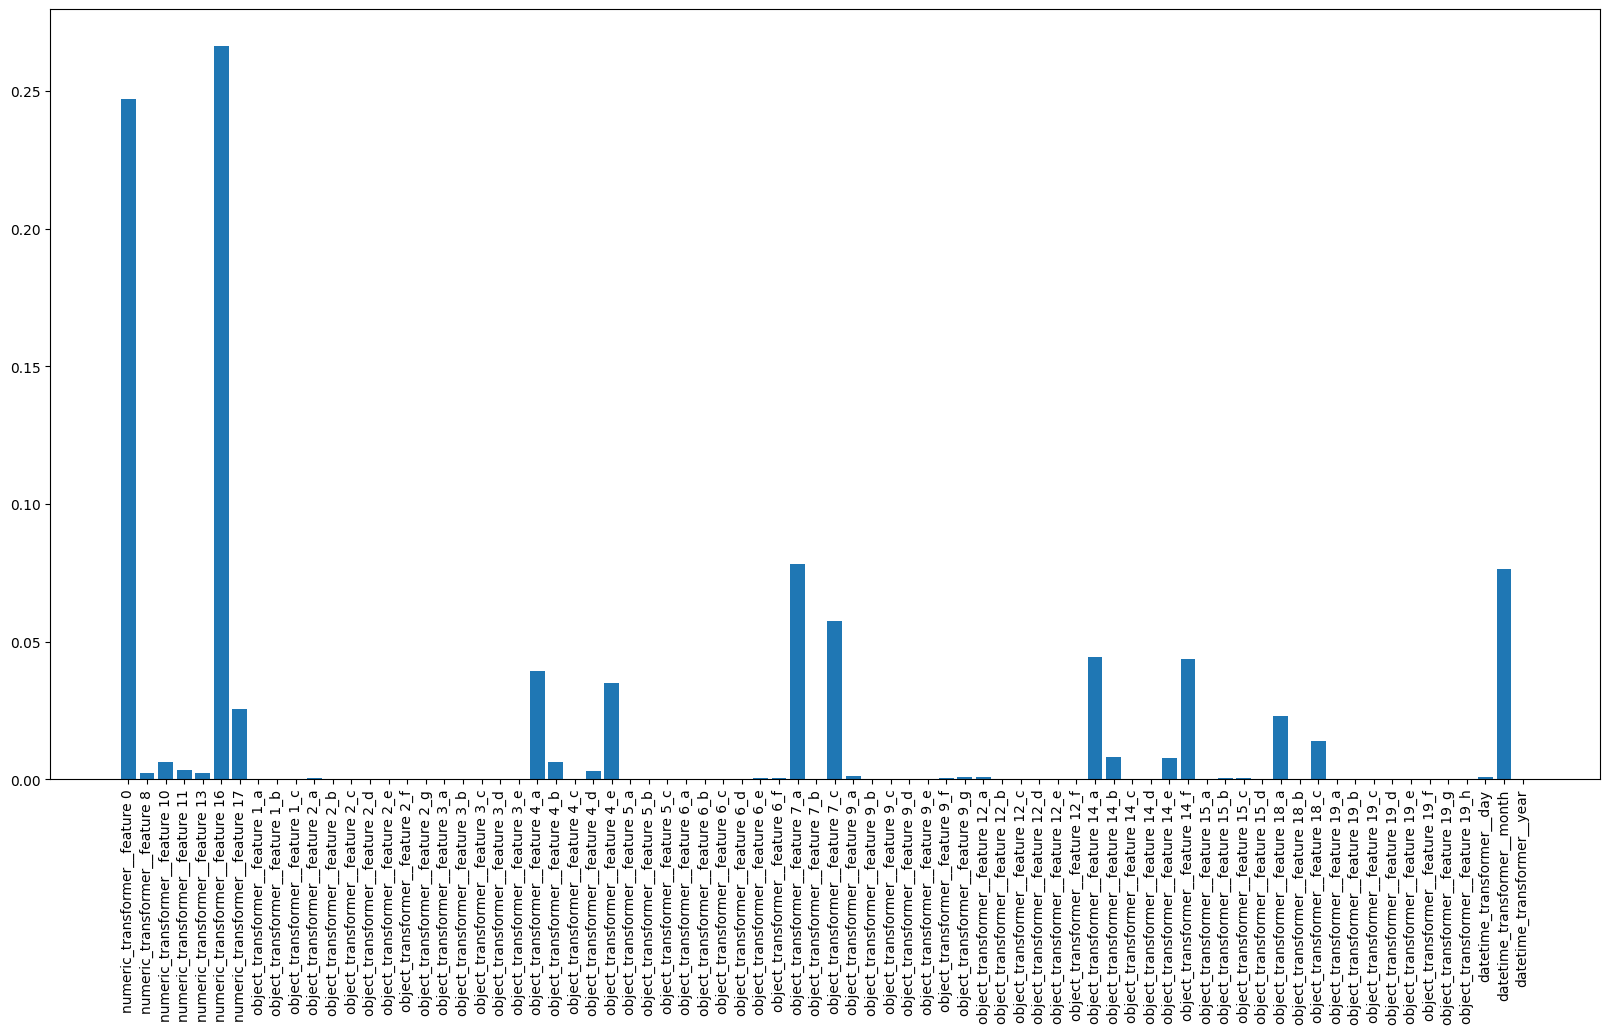

In [12]:
plt.figure(figsize=[20, 10])
plt.bar(
    pl.steps[0][1].get_feature_names_out(),
    pl.steps[1][1].feature_importances_
)
plt.xticks(rotation=90)
plt.show()

So now it's much easier to conclude that useful features here are: 0,16,17,4,7,14,18 and months from `date feature`. So it's namy features to exclude and as a result optimise the model.